## IMPORT LIBRARIES

In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## LOAD DATASETS

In [2]:
train = pd.read_csv("train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test = pd.read_csv("test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## EXPLORATORY DATA ANALYSIS

### FEATURES

In [4]:
train.shape, test.shape

((1460, 81), (1459, 80))

* There are 1460 instances of training data and 1459 of test data. Total number of features are 81, of which 36 is quantitative, 43 categorical (one of them is the Id column which we will remove later on)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### TARGET VARIABLE

* Target variable is the **SalesPrice** of the houses which we will forecast.
* Let's check the distribution of the train set (as the test set doesn't have these values).

Text(0.5, 1.0, 'Distribution of Sales Price')

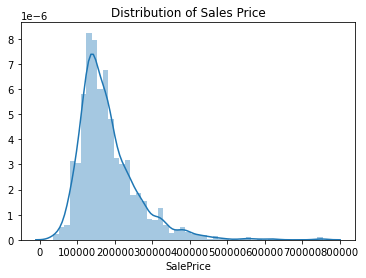

In [6]:
sns.distplot(train['SalePrice'])
plt.title("Distribution of Sales Price", fontsize = 12)

* Looking at the histogram, it seems our target variable is positively skewed, lets apply log-transformation to it. To avoid **division by zero** errors I applied log(1+x) transformation)

Text(0.5, 1.0, 'Distribution of Sales Price (After Transformation)')

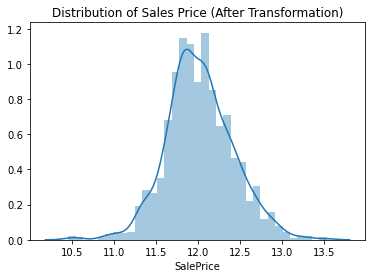

In [7]:
train["SalePrice"] = np.log1p(train["SalePrice"])
sns.distplot(train['SalePrice'])
plt.title("Distribution of Sales Price (After Transformation)", fontsize = 12)

* Now, our target variable follows a normal distribution.

### CORRELATION OF NUMERICAL FEATURES WITH TARGET VARIABLE

In [8]:
#Take the absolute values of correlations with target variable and sort from the highly correlated to low.
cor_target = abs(train.corr()["SalePrice"]).sort_values(ascending=False)
cor_target

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
EnclosedPorch    0.149050
KitchenAbvGr     0.147548
ScreenPorch      0.121208
MSSubClass       0.073959
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
LowQualFinSF     0.037963
YrSold           0.037263
OverallCond      0.036868
MiscVal          0.020021
Id               0.017942
BsmtHalfBath     0.005149
BsmtFinSF2       0.004832
Name: SalePr

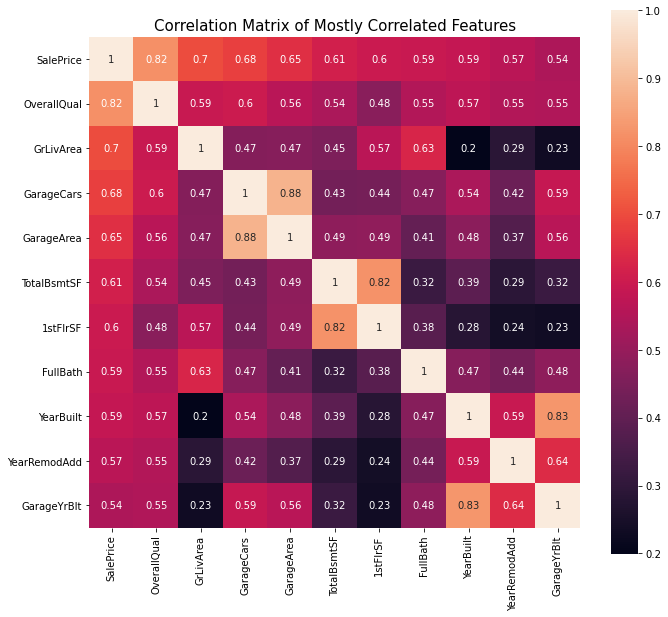

In [9]:
# Plot the correlation matrix of the features that are highly correlated with the target variable
plt.subplots(figsize=(11, 10))
sns.heatmap(train[cor_target[:11,].index].corr(), square=True, annot=True)
## Give title. 
plt.title("Correlation Matrix of Mostly Correlated Features", fontsize = 15);

* Many of the features are correlated with each other.
* **GarageArea** is highly correlated with **GarageCars**
* **YearBuilt** is highly correlated with **GarageYrBlt** and **YearRemodAdd**
* **TotalBsmtSF** and **1stFloor**,**TotRmsAbvGrd** and **GrLivArea**,**GrLivArea** and **FullBath**,**GarageCars** and **GarageArea** highly correlated

#### OUTLIERS
* Let's look at the relationship of some features that are highly correlated with our target variable-SalesPrice with scatter-plot.

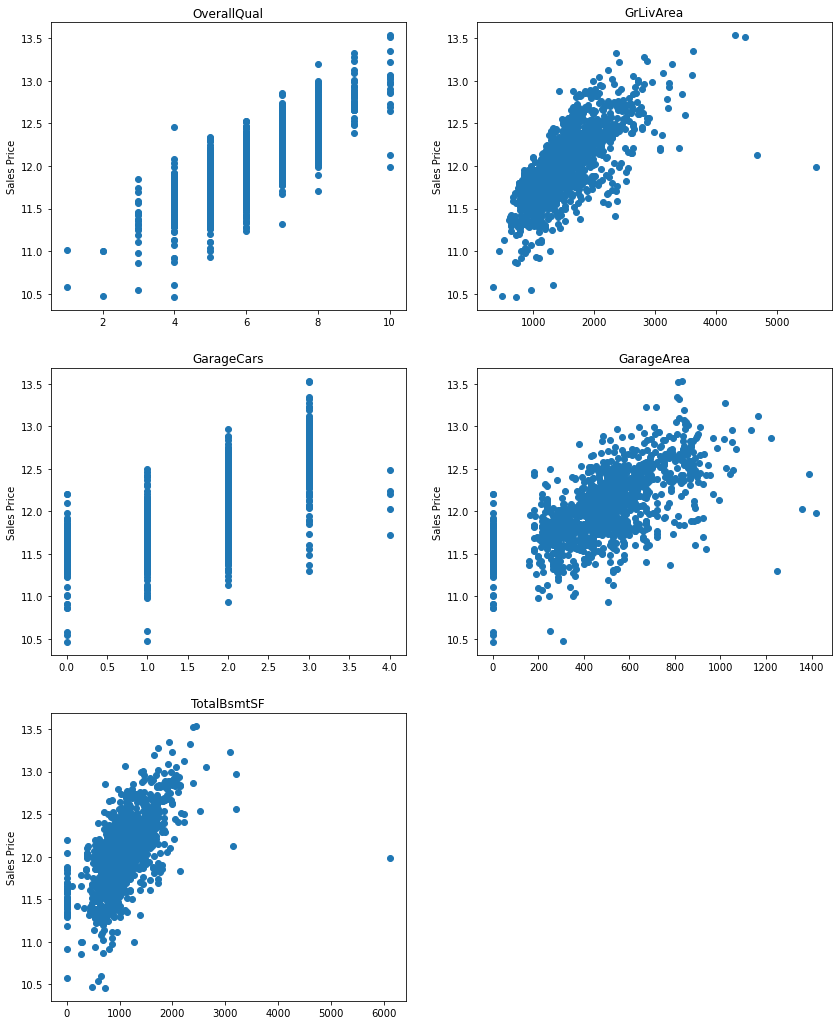

In [10]:
variables = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']
fig, ax = plt.subplots(figsize=(14, 18)) 
ax = [plt.subplot(321), plt.subplot(322), plt.subplot(323), plt.subplot(324), plt.subplot(325)]
for i in range(0, len(ax)):
    ax[i].set_title(variables[i])
    ax[i].set_ylabel('Sales Price')
    ax[i].scatter(train[variables[i]], train['SalePrice'])

plt.show()

* There are 3 points that we can call as outliers and delete them as they didn't follow a trend. One point in TotalBsmtSF - SalePrice plot, and two other at GrLivArea - SalePrice (at higher values), so let's find and delete them.

In [11]:
train.sort_values(by='TotalBsmtSF', ascending=False).head()
train.sort_values(by='GrLivArea', ascending=False).head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,11.982935
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,12.126764
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,13.521141
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,13.534474
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,13.345509


* Looking at the above queries individually, we see that we should drop the rows of ID 524 and 1299

In [12]:
train = train.drop(train[train['Id'] == 524].index)
train = train.drop(train[train['Id'] == 1299].index)
train.shape, test.shape

((1458, 81), (1459, 80))

### HANDLING MISSING VALUES

* To apply the manipulations both train and test set, let's concatenate them.

In [13]:
# Save the target variable values
y = train['SalePrice'].reset_index(drop=True)
# Concatenate train and test set
all_data = pd.concat([train, test]).reset_index(drop=True)

In [14]:
# Drop the ID column (that we don't need) and the target variable
all_data.drop(['Id','SalePrice'], axis=1, inplace=True)
all_data.shape

(2917, 79)

* Let's look at the missing value percentage of features

In [15]:
missingPercentage = (all_data.isnull().sum() * 100 / all_data.shape[0]).sort_values(ascending=False)
missingPercentage = missingPercentage[missingPercentage > 0]

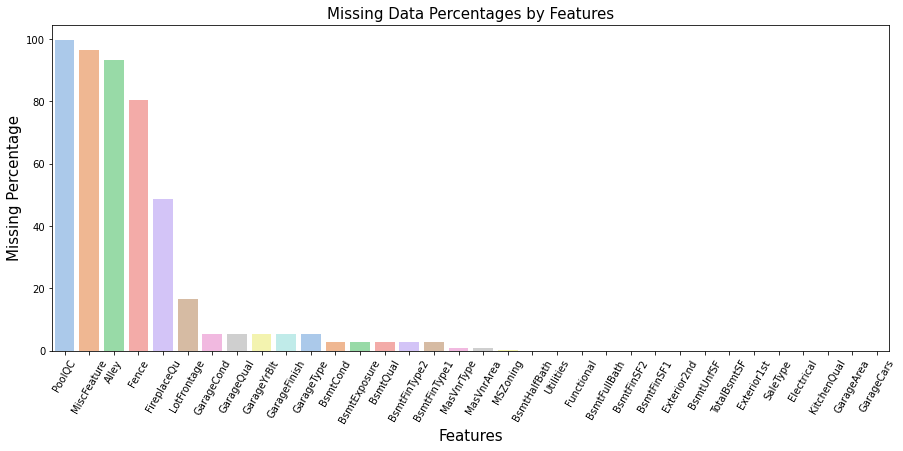

In [16]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=missingPercentage.index, y=missingPercentage, palette="pastel")
plt.xticks(rotation='60')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Missing Percentage', fontsize=15)
plt.title('Missing Data Percentages by Features', fontsize=15);

* Looking at the missing percentage of the variables, we can delete the columns "PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu" since more than 40% of the values of them are missing.

In [17]:
all_data.drop(columns=["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"], inplace=True)

* For the houses that have missing value of **LotFrontage**, we can obtain the approximate value of this by calculating the median of the Neighborhood houses' Lotfrontage.

In [18]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

* We can fill numerical variables of **BsmtFullBath, BsmtHalfBath, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, GarageYrBlt, GarageArea, GarageCars, MasVnrArea** with the value "0" since the missing values in these variables means that the house doesn't have this utility

In [19]:
columns_zero = ['BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageYrBlt', 
                'GarageArea', 'GarageCars', 'MasVnrArea']
all_data[columns_zero] = all_data[columns_zero].fillna(0)

* We can fill categorical variables of **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, GarageType, GarageFinish, GarageQual, FireplaceQu, GarageCond** with a new category **"None"** because the missing values in these variables means that the house doesn't have this utility, for example if "BsmtQual" is **NAAN**, it means the house doesn't have a basement.

In [20]:
columns_none = ['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','GarageCond','GarageFinish',
                'GarageType','GarageQual']
all_data[columns_none] = all_data[columns_none].fillna("None")

* For the **Functional** variable, description tells that "assume typical unless deductions are warranted"

In [21]:
all_data['Functional'] = all_data['Functional'].fillna("Typ")

* We can fill the rest of categorical missing variables with the most frequent value (using its own most frequent value).

In [22]:
columns_mode = ['MSZoning', 'MasVnrType', 'Electrical', 'Utilities', 'Exterior1st', 'Exterior2nd', 'SaleType', 'KitchenQual']
for i in columns_mode:
    all_data[i] = all_data[i].fillna(all_data[i].mode()[0])

* **MSSubClass** feature should be categorical but stored as numeric, so convert them to categorical variables. 
* There exists a column for **YrSold**, i think we can exclude the **MoSold** feature as year sold is sufficient.

In [23]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data.drop(columns=['MoSold'], inplace=True)

* We finally end up with a clean dataset

In [24]:
print('Total missing data points: {}'.format(all_data.isna().sum().sum()))

Total missing data points: 0


### FEATURE TRANSFORMATIONS

* Let's look at the distribution of the numerical features and apply transformation to a feature that has a skew value greater than 0.5

In [25]:
from scipy.stats import skew
# Get the numerical features, find the skewness of them and find the features that have skew > 0.5
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats =  all_data[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skewed_feats = skewed_feats[abs(skewed_feats) > 0.5].index
high_skewed_feats

Index(['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch',
       'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch',
       'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', '1stFlrSF',
       'LotFrontage', 'GrLivArea', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF',
       'TotRmsAbvGrd', 'Fireplaces', 'HalfBath', 'TotalBsmtSF', 'BsmtFullBath',
       'OverallCond', 'YearBuilt', 'GarageYrBlt'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of LotArea')

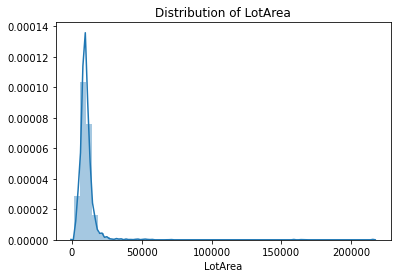

In [26]:
# Look at the distribution of one of the features before transformation
sns.distplot(all_data['LotArea']);
plt.title("Distribution of LotArea", fontsize = 12)

In [27]:
# Apply transformation to skewed features
for feature in high_skewed_feats:
    all_data[feature] = np.log1p(all_data[feature])

Text(0.5, 1.0, 'Distribution of LotArea (After Transformation)')

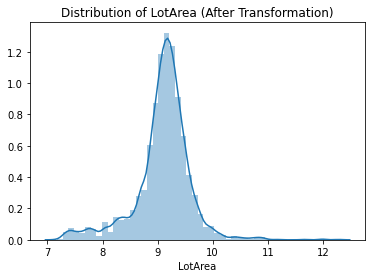

In [28]:
# Look at the distribution after transformation
sns.distplot(all_data['LotArea']);
plt.title("Distribution of LotArea (After Transformation)", fontsize = 12)

* Finally create Dummy variables from the categorical features 

In [29]:
all_data = pd.get_dummies(all_data).reset_index(drop=True)
all_data.shape

(2917, 292)

### Train and Test Set Seperation 

* Now that we have finished EDA, we can seperate the sets that we concatenated before 

In [30]:
X = all_data.iloc[:len(y), :] # the training set's features that are given to us
X_test = all_data.iloc[len(y):, :] # the test set (without target values) that we will use when submission
X.shape, y.shape, X_test.shape

((1458, 292), (1458,), (1459, 292))

## MODELING

In [31]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, KFold

In [32]:
# Set cross validation folds
kf = KFold(n_splits=10, shuffle=True, random_state=123)

### RIDGE REGRESSION

In [33]:
from sklearn.linear_model import RidgeCV
# set lambda parameters
lambda_ridge = [5.0, 5.1, 5.2, 5.3, 5.4, 5.5]
# First apply RobustScaling to scale features that are robust to outliers, then apply CrossValidation
ridge = make_pipeline(RobustScaler(),
                      RidgeCV(alphas = lambda_ridge, cv= kf))

### LASSO REGRESSION

In [34]:
from sklearn.linear_model import LassoCV
# set lambda parameters
lambda_lasso = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
# First apply RobustScaling to scale features that are robust to outliers, then apply CrossValidation
lasso = make_pipeline(RobustScaler(),
                      LassoCV(alphas = lambda_lasso, cv= kf, max_iter=1e7))

### ELASTICNET REGRESSION

In [35]:
from sklearn.linear_model import ElasticNetCV
# set lambda parameters
lambda_elastic = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
# First apply RobustScaling to scale features that are robust to outliers, then apply CrossValidation
elastic = make_pipeline(RobustScaler(),
                      ElasticNetCV(alphas = lambda_elastic, cv= kf, max_iter=1e7))

### RANDOM FOREST

In [36]:
from sklearn.ensemble import RandomForestRegressor
randfor = RandomForestRegressor(
                n_estimators=1200,
                max_depth=15,
                min_samples_split=5,
                min_samples_leaf=5,
                oob_score=True,
                random_state=123)

### SUPPORT VECTOR REGRESSOR

In [37]:
from sklearn.svm import SVR
svmr = make_pipeline(RobustScaler(),
                    SVR(
                        C=21, 
                        epsilon=0.01, 
                        gamma=0.0003))

### XGBOOST

In [38]:
from xgboost import XGBRegressor
xgb = XGBRegressor(
        learning_rate=0.01,
        n_estimators=5000,
        max_depth=4,
        min_child_weight=0,
        subsample=0.7,
        colsample_bytree=0.7,
        nthread=-1,
        seed=123)

### LIGHT GBM

In [39]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(
            n_estimators=5000,
            learning_rate=0.01, 
            num_leaves=6,
            max_bin=150,
            colsample_bytree=0.3,
            min_child_samples=8,
            random_state=123,
            verbose=-1)

### CROSS VALIDATION SCORES OF EACH MODEL

In [40]:
# Get the root-mean-squared-error of each fold, take the mean as RMSE score of this model
# Ridge Regression
score_ridge = -cross_val_score(ridge, X, y, scoring='neg_root_mean_squared_error', cv=kf).mean()
print("Ridge Regression RMSE score: {}".format(score_ridge))
# Lasso Regression
score_lasso = -cross_val_score(lasso, X, y, scoring='neg_root_mean_squared_error', cv=kf).mean()
print("Lasso Regression RMSE score: {}".format(score_lasso))
# Elasticnet Regression 
score_elastic = -cross_val_score(elastic, X, y, scoring='neg_root_mean_squared_error', cv=kf).mean()
print("Elasticnet Regression RMSE score: {}".format(score_elastic))
# Random Forest Regressor
score_randfor = -cross_val_score(randfor, X, y, scoring='neg_root_mean_squared_error', cv=kf).mean()
print("Random Forest Regressor RMSE score: {}".format(score_randfor))
# Support Vector Regressor
score_svmr = -cross_val_score(svmr, X, y, scoring='neg_root_mean_squared_error', cv=kf).mean()
print("Support Vector Regressor RMSE score: {}".format(score_svmr))
# XGBoost
score_xgb = -cross_val_score(xgb, X, y, scoring='neg_root_mean_squared_error', cv=kf).mean()
print("XGBoost Regressor RMSE score: {}".format(score_xgb))
# Light GBM
score_lgbm = -cross_val_score(lgbm, X, y, scoring='neg_root_mean_squared_error', cv=kf).mean()
print("Light GBM RMSE score: {}".format(score_lgbm))

Ridge Regression RMSE score: 0.11061689961540025
Lasso Regression RMSE score: 0.11036308237882371
Elasticnet Regression RMSE score: 0.11031900191489177
Random Forest Regressor RMSE score: 0.14045109609738554
Support Vector Regressor RMSE score: 0.11087980767858474
XGBoost Regressor RMSE score: 0.1125883740918396
Light GBM RMSE score: 0.11334267975108156


In [41]:
scores_df = pd.DataFrame(data=np.array([score_ridge, score_lasso, score_elastic, score_randfor, 
                                        score_svmr, score_xgb, score_lgbm]), 
                         index=['Ridge','Lasso','ElasticNet', 'Random Forest', 'Support Vector', 'XGBoost', 'LGBM'],
                         columns=['Root_Mean_Sq_Err'])
scores_df = scores_df.sort_values(by='Root_Mean_Sq_Err')
scores_df

,Root_Mean_Sq_Err
ElasticNet,0.110319
Lasso,0.110363
Ridge,0.110617
Support Vector,0.110880
XGBoost,0.112588
LGBM,0.113343
Random Forest,0.140451


* Although the results are very close to each other, **Elasticnet Regression** is the winner.
* Random Forest has the worst score, so I will not include it while stacking below.

### COMBINATION OF MODELS (STACKING)

* I put all models to the stacking (except Random Forest Regressor as it's score is a bit worse than others), and select elasticnet regression as the meta-regressor as it is the winner of all. 

In [52]:
from mlxtend.regressor import StackingCVRegressor
stacked_model = StackingCVRegressor(
                    regressors=(elastic, lasso, ridge, svmr, lgbm, xgb),
                    meta_regressor=elastic,
                    use_features_in_secondary=True,
                    n_jobs=-1)

* Let's look at the score of the training data using stacked model

In [54]:
from sklearn.metrics import mean_squared_error as mse
stacked_fit = stacked_model.fit(np.array(X), np.array(y))
y_preds = stacked_fit.predict(np.array(X))
stacked_rmse = mse(y, y_preds, squared=False)
print('RMSE score of Stacked Model (training data): {}'.format(stacked_rmse))

RMSE score of Stacked Model (training data): 0.09103865418046915


## SUBMISSION

#### PREDICT REAL TEST DATA

In [55]:
# Read the sample submission file
submission = pd.read_csv("sample_submission.csv")
# Predict values and then apply inverse transformation to the sale prices
submission['SalePrice'] = np.floor(np.expm1(stacked_fit.predict(np.array(X_test))))

#### FIX OUTLIERS

In [56]:
q1 = submission['SalePrice'].quantile(0.005)
q2 = submission['SalePrice'].quantile(0.995)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)

#### SUBMIT

In [57]:
submission.to_csv("submission.csv", index=False)